# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#settle the requires units
units = "metric"
query_url=f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | alaghsas
Processing Record 4 of Set 1 | sisimiut
Processing Record 5 of Set 1 | nova sintra
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | kavaratti
Processing Record 8 of Set 1 | san antonio de pale
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | whangarei
Processing Record 13 of Set 1 | onguday
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | bubaque
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 19 of Set 1 | umm ruwaba
Processing Record 20 of Set 1 | aykhal
Processing Record 21 of Set 1 | ust-nera
Processing Record 22 of 

Processing Record 40 of Set 4 | chibougamau
Processing Record 41 of Set 4 | jamestown
Processing Record 42 of Set 4 | kudat
Processing Record 43 of Set 4 | karratha
Processing Record 44 of Set 4 | altamont
Processing Record 45 of Set 4 | akrehamn
Processing Record 46 of Set 4 | nanao
Processing Record 47 of Set 4 | jiazi
Processing Record 48 of Set 4 | yakeshi
Processing Record 49 of Set 4 | isola di capo rizzuto
Processing Record 0 of Set 5 | malpe
Processing Record 1 of Set 5 | kapuskasing
Processing Record 2 of Set 5 | chengam
Processing Record 3 of Set 5 | aliwal north
Processing Record 4 of Set 5 | paraparaumu
Processing Record 5 of Set 5 | puerto ayora
Processing Record 6 of Set 5 | howrah
Processing Record 7 of Set 5 | dakhla
Processing Record 8 of Set 5 | ishigaki
Processing Record 9 of Set 5 | zaragoza
Processing Record 10 of Set 5 | bari
Processing Record 11 of Set 5 | st. john's
Processing Record 12 of Set 5 | mejit
Processing Record 13 of Set 5 | lakatoro
Processing Record 

Processing Record 35 of Set 8 | cidreira
Processing Record 36 of Set 8 | corinto
Processing Record 37 of Set 8 | taranagar
Processing Record 38 of Set 8 | kiunga
Processing Record 39 of Set 8 | daoukro
Processing Record 40 of Set 8 | awjilah
Processing Record 41 of Set 8 | esperanza
Processing Record 42 of Set 8 | meulaboh
Processing Record 43 of Set 8 | kununurra
Processing Record 44 of Set 8 | vilyuchinsk
Processing Record 45 of Set 8 | cranbrook
Processing Record 46 of Set 8 | kosciuszko national park
City not found. Skipping...
Processing Record 47 of Set 8 | smithers
Processing Record 48 of Set 8 | tenno
Processing Record 49 of Set 8 | enewetak
Processing Record 0 of Set 9 | valenca
Processing Record 1 of Set 9 | ascension
Processing Record 2 of Set 9 | bahia de caraquez
Processing Record 3 of Set 9 | remire-montjoly
Processing Record 4 of Set 9 | mahina
Processing Record 5 of Set 9 | 'ohonua
City not found. Skipping...
Processing Record 6 of Set 9 | devinuwara
City not found. Ski

Processing Record 20 of Set 12 | canmore
Processing Record 21 of Set 12 | ar rutbah
Processing Record 22 of Set 12 | petrovsk
Processing Record 23 of Set 12 | kirakira
Processing Record 24 of Set 12 | papao
Processing Record 25 of Set 12 | mirpur sakro
Processing Record 26 of Set 12 | hurricane
Processing Record 27 of Set 12 | tanjung selor
City not found. Skipping...
Processing Record 28 of Set 12 | ikongo
Processing Record 29 of Set 12 | south venice
Processing Record 30 of Set 12 | palikir - national government center
Processing Record 31 of Set 12 | jayapura
Processing Record 32 of Set 12 | lajinha
Processing Record 33 of Set 12 | rumonge
Processing Record 34 of Set 12 | 'alaqahdari dishu
Processing Record 35 of Set 12 | dedza
Processing Record 36 of Set 12 | barra de santo antonio
Processing Record 37 of Set 12 | trapani
Processing Record 38 of Set 12 | bei'an
Processing Record 39 of Set 12 | chake chake
Processing Record 40 of Set 12 | klaksvik
Processing Record 41 of Set 12 | nu

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,13.99,91,73,1.67,ZA,1689613730
1,blackmans bay,-43.0167,147.3167,11.07,67,50,4.49,AU,1689613570
2,alaghsas,17.0187,8.0168,40.97,8,11,2.14,NE,1689613849
3,sisimiut,66.9395,-53.6735,6.07,99,100,1.04,GL,1689613664
4,nova sintra,14.8667,-24.7167,22.51,80,40,7.38,CV,1689613609


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,13.99,91,73,1.67,ZA,1689613730
1,blackmans bay,-43.0167,147.3167,11.07,67,50,4.49,AU,1689613570
2,alaghsas,17.0187,8.0168,40.97,8,11,2.14,NE,1689613849
3,sisimiut,66.9395,-53.6735,6.07,99,100,1.04,GL,1689613664
4,nova sintra,14.8667,-24.7167,22.51,80,40,7.38,CV,1689613609


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

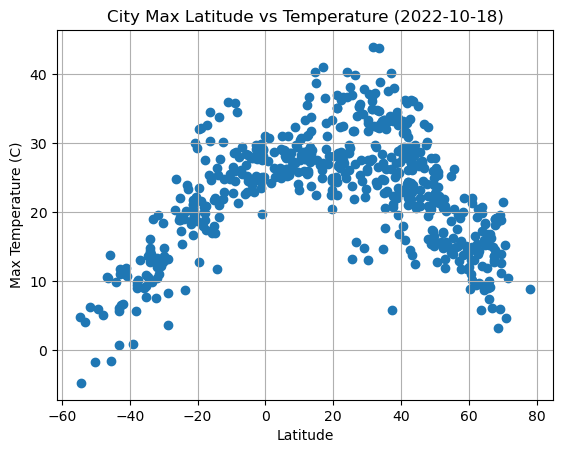

In [8]:
# Build scatter plot for latitude vs. temperature

Latitude=city_data_df["Lat"]
Temperature=city_data_df["Max Temp"]
plt.scatter(Latitude,Temperature)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

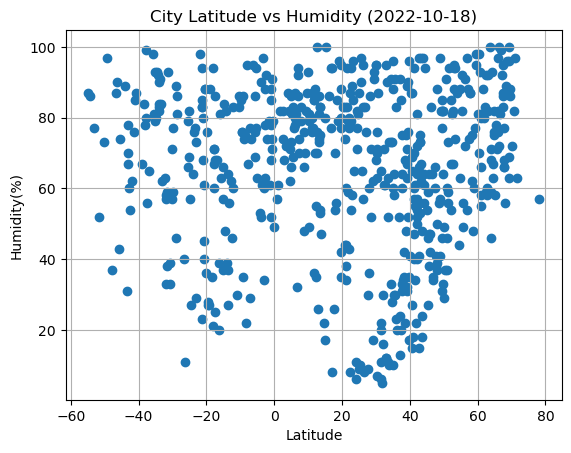

In [9]:
# Build the scatter plots for latitude vs. humidity
Humidity=city_data_df["Humidity"]
plt.scatter(Latitude,Humidity)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

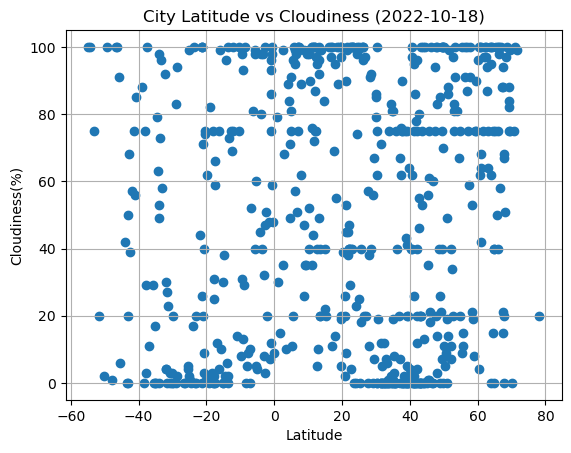

In [10]:
# Build the scatter plots for latitude vs. cloudiness
Cloudiness=city_data_df["Cloudiness"]
plt.scatter(Latitude,Cloudiness)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

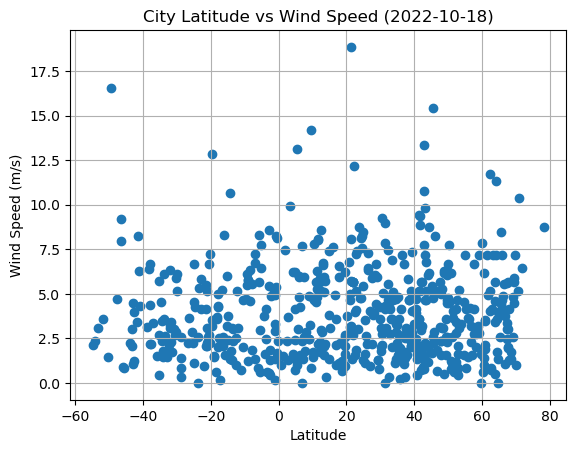

In [11]:
# Build the scatter plots for latitude vs. wind speed
winds=city_data_df["Wind Speed"]
plt.scatter(Latitude,winds)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots
import scipy.stats as st
def LinearRegre(x_axis,y_axis,y_label):
    print(f"The r-value is: {round(st.pearsonr(x_axis,y_axis)[0],10)}")
    pe_slope,pe_int,pe_r,pe_p,pe_std_err=st.linregress(x_axis,y_axis)
    pe_fit=pe_slope*x_axis+pe_int
    line_eq="y = "+str(round(pe_slope,2))+"x +"+str(round(pe_int,2))
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,pe_fit,"--",color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(line_eq)
    

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,alaghsas,17.0187,8.0168,40.97,8,11,2.14,NE,1689613849
3,sisimiut,66.9395,-53.6735,6.07,99,100,1.04,GL,1689613664
4,nova sintra,14.8667,-24.7167,22.51,80,40,7.38,CV,1689613609
6,kavaratti,10.5669,72.6420,28.21,80,90,7.77,IN,1689613850
8,sitka,57.0531,-135.3300,12.94,88,75,1.54,US,1689613732


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,13.99,91,73,1.67,ZA,1689613730
1,blackmans bay,-43.0167,147.3167,11.07,67,50,4.49,AU,1689613570
5,port-aux-francais,-49.3500,70.2167,5.96,97,100,16.56,TF,1689613577
7,san antonio de pale,-1.4014,5.6325,23.44,79,48,5.15,GQ,1689613703
9,invercargill,-46.4000,168.3500,10.52,90,100,7.96,NZ,1689613704


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6228952092
y = -0.26x +34.03


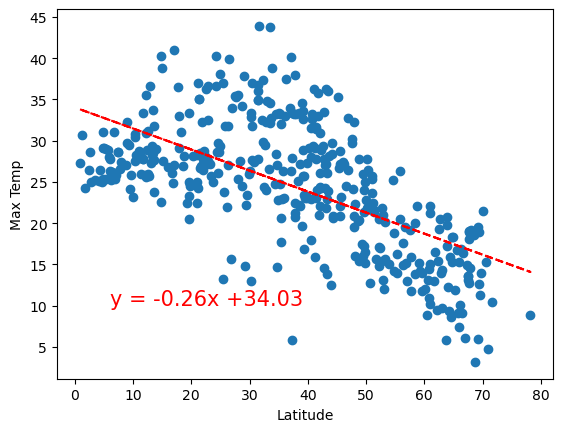

In [55]:
# Linear regression on Northern Hemisphere
Latituden=northern_hemi_df["Lat"]
Temperaturen=northern_hemi_df["Max Temp"]
y_label="Max Temp"
LinearRegre(Latituden,Temperaturen,y_label)

The r-value is: 0.8508900694
y = 0.51x +30.1


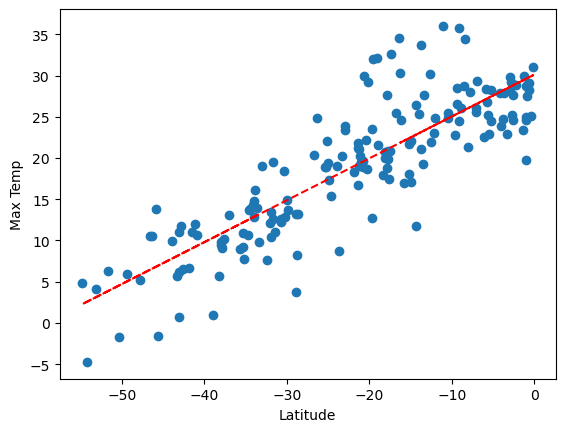

In [56]:
# Linear regression on Southern Hemisphere
Latitudes=southern_hemi_df["Lat"]
Temperatures=southern_hemi_df["Max Temp"]
y_labels="Max Temp"
LinearRegre(Latitudes,Temperatures,y_labels)


**Discussion about the linear relationship:** YOUR RESPONSE HERE
On the northern hemisphere plot there is a inverse correlation between the variables, we can see that as the Latitude increments the temperature decrements, or in other word as we get further form the equator the temperature decreases.
On the southern hemisphere we can see that the value of the slope is positive so its a positive correlation between the variables, as we get closer to the Equator(0) the temperature increases.
So the coclusion is that 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0573415236
y = 0.07x +62.25


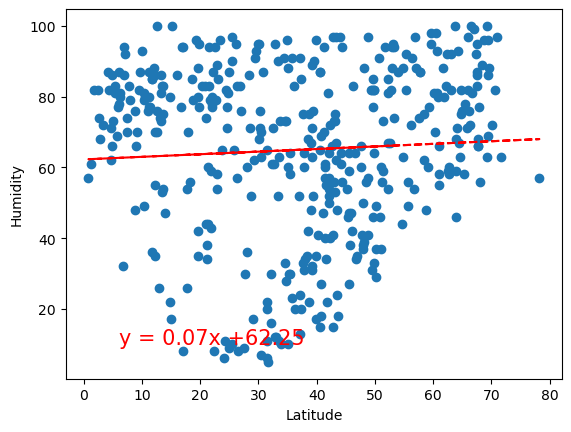

In [57]:
# Northern Hemisphere
Humidityn=northern_hemi_df["Humidity"]
y_label="Humidity"
LinearRegre(Latituden,Humidityn,y_label)

The r-value is: -0.071367896
y = -0.11x +64.89


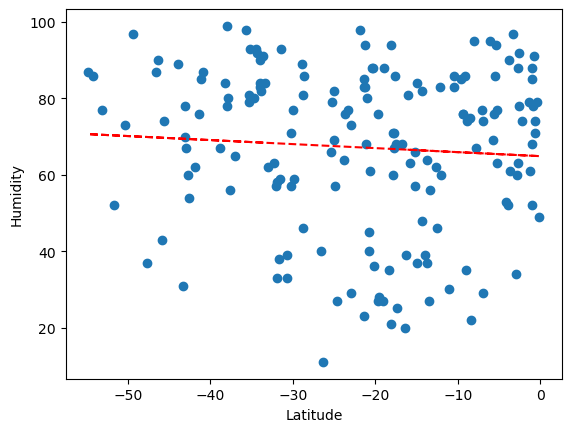

In [58]:
# Southern Hemisphere
Humiditys=southern_hemi_df["Humidity"]
y_label="Humidity"
LinearRegre(Latitudes,Humiditys,y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.0217253806
y = -0.04x +53.59


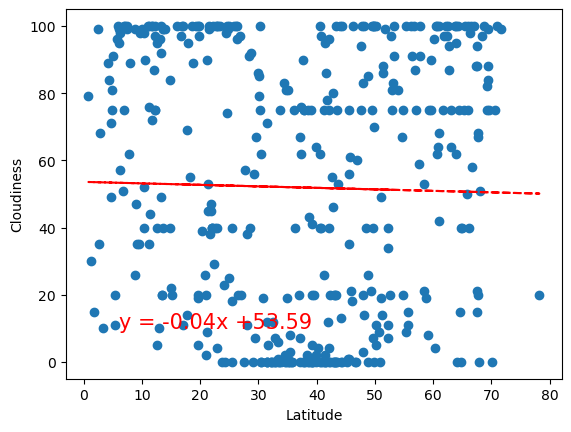

In [59]:
# Northern Hemisphere
cloudsn=northern_hemi_df["Cloudiness"]
y_label="Cloudiness"
LinearRegre(Latituden,cloudsn,y_label)

The r-value is: 0.0422411254
y = 0.11x +44.21


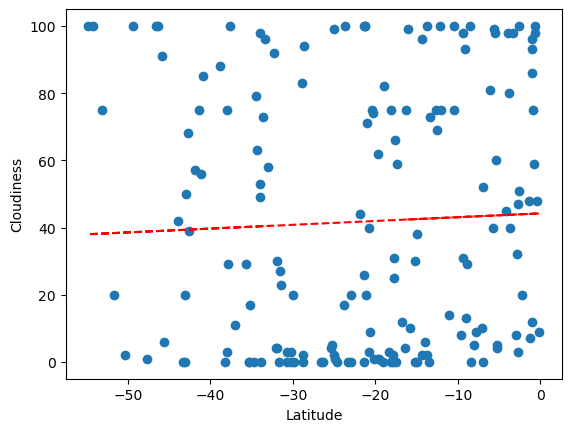

In [60]:
# Southern Hemisphere
cloudss=southern_hemi_df["Cloudiness"]
y_label="Cloudiness"
LinearRegre(Latitudes,cloudss,y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Analyzing both of the linear regressions (Northerns vs Southern) we can conclude that there is no correlation between cloudiness and Latitude because the value of both slopes is close zero.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0363515208
y = -0.01x +4.2


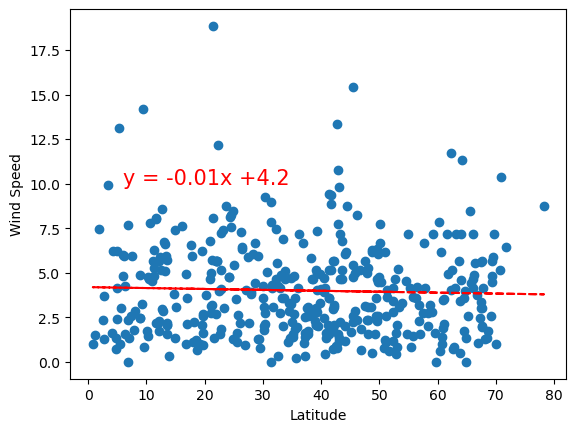

In [61]:
# Northern Hemisphere
windn=northern_hemi_df["Wind Speed"]
y_label="Wind Speed"
LinearRegre(Latituden,windn,y_label)

The r-value is: -0.0046541287
y = -0.0x +3.61


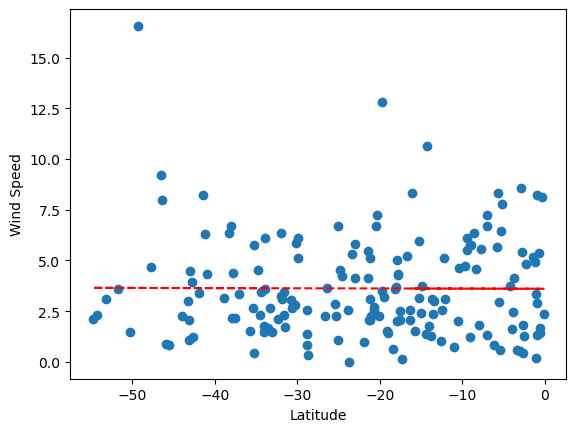

In [62]:
# Southern Hemisphere
windss=southern_hemi_df["Wind Speed"]
y_label="Wind Speed"
LinearRegre(Latitudes,windss,y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Analyzing both of the linear regressions (Northerns vs Southern) we can conclude that there is no correlation between Wind Speed and Latitude because the value of both slopes is close to zero.